# **Lista 1 - Regressão linear, polinomial e regularização**

## Aprendizagem de Máquina - 2022.1
## Matheus do Vale Almeida - 473219

In [202]:
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para gerar gráficos

## **Questão 01:**

In [203]:
artificial1_dataset = np.genfromtxt('./artificial1d.csv', delimiter=',')

In [204]:
# Entrada de dados
uns = np.ones((artificial1_dataset.shape[0], 1))
X = artificial1_dataset[:, [0]]
X_uns = np.c_[uns, X]
y_real = artificial1_dataset[:, [1]]

In [205]:
# MSE (erro quadrático médio)
def MSE (y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

In [206]:
# Normalização escore-Z
def normalZ(X):
    N = len(X)

    mi = np.mean(X)
    desvio = np.sqrt((1/N-1) * (sum(X - mi) ** 2))

    return (X - mi) / desvio

In [207]:
# Desnormalização
def desnormalZ(X):
    N = len(X)

    mi = np.mean(X)
    desvio = np.sqrt((1/N-1) * (sum(X - mi) ** 2))

    return desvio * X + mi

### **Item A)**

---



In [ ]:
# Regressão Linear via mínimos quadrados ordinários (OLS)
def OLS (X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

**Parâmetros do modelo:**

In [ ]:
w = OLS(X_uns, y_real)
w

array([[0.06761792],
       [1.57486517]])

**MSE (erro quadrático médio) obtidos pelo algoritmo:**

In [ ]:
y_pred = X_uns @ w
MSE = MSE(y_real, y_pred)
MSE

0.21340090132936987

**Reta resultante sobre os dados:**

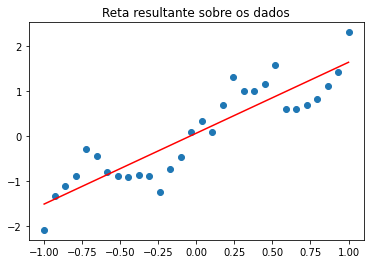

In [ ]:
plt.scatter(X, y_real)
plt.plot(X, y_pred, color='red')
plt.title("Reta resultante sobre os dados")
plt.show()

# **Item B)**

---


In [ ]:
# Regressão Linear via GD (gradiente descendente)
def GD(X, y_real):
    #um valor alfa positivo pequeno
    alfa = 0.01

    #inicializando os parametros na iteração 0
    w0 = 0
    w1 = 0

    MSEm = [[0 for x in range(1)] for y in range(1200)]
    eixox = [[0 for x in range(1)] for y in range(1200)] 
    
    N = len(X)
    for t in range(1200):
        #calcule os erros do modelo
        y_pred = w0 + w1 * X
        e1 = sum(y_real - y_pred)
        e2 = sum((y_real - y_pred) * X)

        #atualize os parâmetros
        w0 = w0 + alfa * 1/N * e1
        w1 = w1 + alfa * 1/N * e2

        MSEm[t][0] = MSE(y_real, y_pred)
        eixox[t][0] = t

    plt.plot(eixox, MSEm, color="black")
    plt.title("MSE ao longo das iterações do GD")
    plt.xlabel("Iterações")
    plt.ylabel("Função custo")
    plt.show()

    return y_pred, w0, w1

**Parâmetros do modelo e Curva de Aprendizagem do algoritmo:**



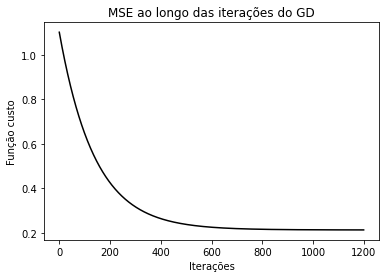

In [ ]:
y_predGD, w0, w1 = GD(X, y_real)

In [ ]:
print(w0, w1)

[0.06761753] [1.55314097]


**MSE (erro quadrático médio) obtidos pelo algoritmo:**

In [ ]:
MSE_GD = MSE(y_real, y_predGD)
MSE_GD

0.21357026899258522

**Reta resultante sobre os dados:**

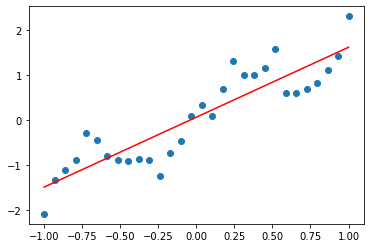

In [ ]:
plt.scatter(X, y_real)
plt.plot(X, y_predGD, color="red")
plt.show()

### **Item C)**

---



In [ ]:
import random

In [309]:
# Regressão Linear via SGD (stochastic gradiente descendente)
def SGD(X, y_real):
    #um valor alfa positivo pequeno
    alfa = 0.01

    #inicializando os parametros na iteração 0
    w0 = 0
    w1 = 0

    MSEm = [[0 for x in range(1)] for y in range(1200)]
    eixox = [[0 for x in range(1)] for y in range(1200)] 

    N = len(X)
    y_pred = [[0 for x in range(1)] for y in range(N)]
    e1 = [[0 for x in range(1)] for y in range(N)]
    t = 0

    while t < 1200:
        #permute aleatoriamente a ordem dos dados
        xy = np.c_[X, y_real]
        random.shuffle(xy)
        x = xy[:, [0]]
        y = xy[:, [1]]
        
        for i in range(N):
            #calcule os erros do modelo
            y_pred[i] = w0 + w1 * x[i]
            e1[i] = y[i] - y_pred[i]

            #atualize os parâmetros
            w0 = w0 + alfa * e1[i]
            w1 = w1 + alfa * e1[i] * x[i]

            MSEm[t][0] = MSE(y, y_pred)
            eixox[t][0] = t

            t = t + 1

    plt.plot(eixox, MSEm, color="black")
    plt.title("MSE ao longo das iterações do GD")
    plt.xlabel("Iterações")
    plt.ylabel("Função custo")
    plt.show()

    return y_pred, w0, w1

**Parâmetros do modelo e Curva de Aprendizagem do algoritmo:**

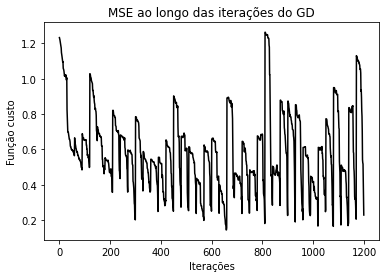

In [310]:
y_predSGD, w0SGD, w1SGD = SGD(X, y_real)

In [307]:
print(w0SGD, w1SGD)

[-0.00583454] [1.44175358]


**MSE (erro quadrático médio) obtidos pelo algoritmo:**

In [308]:
MSE_SGD = MSE(y_real, y_predSGD)
MSE_SGD

1.1945574698977386

**Reta resultante sobre os dados:**

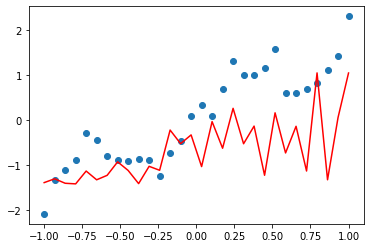

In [288]:
plt.scatter(X, y_real)
plt.plot(X, y_predSGD, color="red")
plt.show()